# Symbolické počty
V tomto tutoriálu je představen modul [Sympy](http://www.sympy.org/en/index.html), který slouží k počtům se symbolickou proměnnou v Pythonu. Kód pro import Sympy a nastavení Pylabu následuje.

In [1]:
# inline plots 
%matplotlib inline 
# import sympy
import sympy as sp 

Aby bylo možné zobrazit výstup ze Sympy pomocí Latex rovnicí v Jupyter Notebook, následující nastavení musí být provedeno.

In [2]:
sp.init_printing(use_latex='mathjax')

***
## Práce se Sympy
Na začátku je potřeba si vytvořit symbolické proměnné. Příklad následuje.

In [3]:
x, y, z = sp.symbols('x y z')

Od teď je možné proměnné `x, y, z` (Sympy objekty proměnná) používat při počtech.

In [4]:
sp.Eq(x + y, z) # create equation

x + y = z

In [5]:
sp.simplify(x**2 + y - 2*z / (x*z)) # simplify expression

 2       2
x  + y - ─
         x

Některé funkce Sympy dokáží také pracovat s výrazem/rovnicí zadanou jako text. V tomto případě není potřeba proměnné vytvářet předem. V následujícím příkladu užijeme proměnné *a* a *b*, které předtím nijak nedefinujeme!

In [6]:
sp.simplify("a + b**2")

     2
a + b 

Některé funkce vrací svůj výsledek ve formě objektu, který je možný následně použít. Ukázáno na příkladu.

In [7]:
f = sp.simplify("a + b**2 / (a*b)") # creation of Sympy object - expression
type(f)

sympy.core.add.Add

In [8]:
f.cancel()

 2    
a  + b
──────
  a   

Poznámka: alternativní použití podobných funkcí je možno přímo s textem jako argument - příklad následuje:

In [9]:
sp.cancel("a + b**2 / (a*b)")

 2    
a  + b
──────
  a   

***
## Úpravy výrazů
Následují příklady úprav výrazů na výrazu: $\frac{z+\frac{x^3 + 1}{y^2}}{2(1-x)+x^2}$

In [10]:
f = '(1+(x**3+1/x**2))/(2*(1-x)+x**2)'

### Zjednodušení výrazu

In [11]:
sp.sympify(f)

 3       1  
x  + 1 + ── 
          2 
         x  
────────────
 2          
x  - 2⋅x + 2

### Převedení na kanonickou formu

In [12]:
sp.cancel(f)

   5    2       
  x  + x  + 1   
────────────────
 4      3      2
x  - 2⋅x  + 2⋅x 

### Rozložení na faktory

In [13]:
sp.factor(f)

    5    2       
   x  + x  + 1   
─────────────────
 2 ⎛ 2          ⎞
x ⋅⎝x  - 2⋅x + 2⎠

### Rozklad

In [14]:
sp.expand(f)

      3                                       
     x                1                1      
──────────── + ──────────────── + ────────────
 2              4      3      2    2          
x  - 2⋅x + 2   x  - 2⋅x  + 2⋅x    x  - 2⋅x + 2

### Rozklad na parciální zlomky

In [15]:
fs = sp.simplify(f)
sp.apart(fs)

        3⋅x - 5             1     1  
x + ──────────────── + 2 + ─── + ────
      ⎛ 2          ⎞       2⋅x      2
    2⋅⎝x  - 2⋅x + 2⎠             2⋅x 

### Dosazení hodnoty

In [16]:
fs.subs("x", 5)

3151
────
425 

***
## Řešení rovnic
### Kořeny rovnice
Následují dva příklady jak získat kořeny rovnice.

In [17]:
f = "x**2 +3*x -4"

In [18]:
sp.roots(f)

{-4: 1, 1: 1}

Nebo:

In [19]:
sp.solve(f)


[-4, 1]

### Řešení soustavy rovnic
Pomocí Sympy je možné zadat soustavu rovnic více způsoby. Následuje příklad jak vytvořit soustavu:

$ a + b = 1 $

$ a^4 = c $

$ b - 5/2 = 3 $

pomocí listu rovnic.

In [20]:
a, b, c = sp.symbols("a, b, c")
equations = [
    sp.Eq(a + b, 1),
    sp.Eq(a**4, c),
    sp.Eq(b - 5/2, 3),
]
sp.solve(equations)

[{a: -4.5, b: 5.5, c: 410.0625}]

Poznámka: všiměte si, že vrácen je slovnik uvnitř listu.

***
## Kalkulus

### Derivace

In [21]:
fd = sp.Derivative('2*x*sqrt(1/x)',x)
fd

  ⎛        ___⎞
d ⎜       ╱ 1 ⎟
──⎜2⋅x⋅  ╱  ─ ⎟
dx⎝    ╲╱   x ⎠

In [22]:
fd.doit()

    ___
   ╱ 1 
  ╱  ─ 
╲╱   x 

### Integrál

In [23]:
fi = sp.Integral('2*x*sqrt(1/x)',x)
fi

⌠               
⎮         ___   
⎮        ╱ 1    
⎮ 2⋅x⋅  ╱  ─  dx
⎮     ╲╱   x    
⌡               

In [24]:
fi.doit()

         ___
   2    ╱ 1 
4⋅x ⋅  ╱  ─ 
     ╲╱   x 
────────────
     3      

### Limity

In [25]:
fl = sp.Limit('sin(x)/x', x, 0)
fl

     sin(x)
 lim ──────
x─→0⁺  x   

In [26]:
fl.doit()

1

***
## Kreslení grafů
Sympy používá Matplotlib ke kreslení grafů. Samotný Matplotlib a jeho pokročilé možnosti jsou předmětem jiného tutoriálů. Následuje několik jednoduchých příkladů, jak použít Matplotlib skrze Sympy.

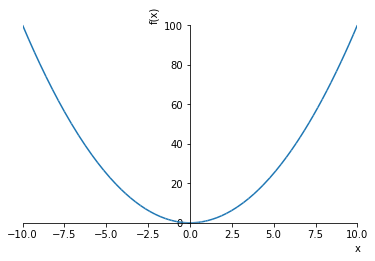

In [27]:
sp.plot(x**2)

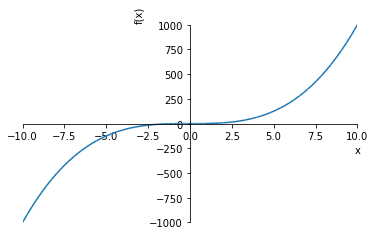

In [28]:
sp.plot(x**3)

***
## Vektory a Matice

In [29]:
A = sp.Matrix([[x, -1], [3, x], [1, 2]])
A

⎡x  -1⎤
⎢     ⎥
⎢3  x ⎥
⎢     ⎥
⎣1  2 ⎦

In [30]:
B = sp.Matrix([[1, -1, 0], [3, 2, 4]])
B

⎡1  -1  0⎤
⎢        ⎥
⎣3  2   4⎦

In [31]:
(A * B)**2

⎡                                  2                                          
⎢      (-x - 2)⋅(3⋅x + 3) + (x - 3)  - 28        (-x - 2)⋅(x - 3) + (-x - 2)⋅(
⎢                                                                             
⎢                                                                             
⎢28⋅x + (x - 3)⋅(3⋅x + 3) + (2⋅x - 3)⋅(3⋅x + 3)    12⋅x + (-x - 2)⋅(3⋅x + 3) +
⎢                                                                             
⎣                  16⋅x + 44                                       -x + 1     

                                        ⎤
2⋅x - 3) - 12   4⋅x⋅(-x - 2) - 4⋅x - 20 ⎥
                                        ⎥
          2                             ⎥
 (2⋅x - 3)     4⋅x⋅(2⋅x - 3) + 20⋅x - 12⎥
                                        ⎥
                       12⋅x + 36        ⎦

In [32]:
2.5 * (B * A)

⎡2.5⋅x - 7.5   -2.5⋅x - 2.5⎤
⎢                          ⎥
⎣7.5⋅x + 25.0  5.0⋅x + 12.5⎦

### Užitečné konstruktory matic

In [33]:
sp.eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [34]:
sp.ones(3,2)

⎡1  1⎤
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎣1  1⎦

In [35]:
sp.zeros(2,3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

### Determinant a charakteristický polynom matice
Následuje ukázka jak získat determinand matice.

In [36]:
C = sp.Matrix([[1, -x, 0], [x, 2, 4], [-3, 2, -4]])
C.det()

     2            
- 4⋅x  + 12⋅x - 16

Následující kód získa charakteristický polynom matice *C*.

In [37]:
p = C.charpoly()
sp.factor(p)

 3    2      2             2            
λ  + λ  + λ⋅x  - 18⋅λ + 4⋅x  - 12⋅x + 16

### Vlastní čísla, vektory
Následují příklady jak spočítat vlastní čísla (*eigenvalues*) a vlastní vektory (*eigenvectors*) matice.

In [38]:
D = sp.Matrix([[1, -1], [x, 2]])
D.eigenvals()

⎧    __________           __________       ⎫
⎪  ╲╱ -4⋅x + 1    3     ╲╱ -4⋅x + 1    3   ⎪
⎨- ──────────── + ─: 1, ──────────── + ─: 1⎬
⎪       2         2          2         2   ⎪
⎩                                          ⎭

In [39]:
D.eigenvects()

⎡⎛    __________                             ⎞  ⎛  __________                 
⎢⎜  ╲╱ -4⋅x + 1    3     ⎡⎡       1        ⎤⎤⎟  ⎜╲╱ -4⋅x + 1    3     ⎡⎡      
⎢⎜- ──────────── + ─, 1, ⎢⎢────────────────⎥⎥⎟, ⎜──────────── + ─, 1, ⎢⎢──────
⎢⎜       2         2     ⎢⎢  __________    ⎥⎥⎟  ⎜     2         2     ⎢⎢    __
⎢⎜                       ⎢⎢╲╱ -4⋅x + 1    1⎥⎥⎟  ⎜                     ⎢⎢  ╲╱ -
⎢⎜                       ⎢⎢──────────── - ─⎥⎥⎟  ⎜                     ⎢⎢- ────
⎢⎜                       ⎢⎢     2         2⎥⎥⎟  ⎜                     ⎢⎢      
⎢⎜                       ⎢⎢                ⎥⎥⎟  ⎜                     ⎢⎢      
⎣⎝                       ⎣⎣       1        ⎦⎦⎠  ⎝                     ⎣⎣      

              ⎞⎤
  1         ⎤⎤⎟⎥
────────────⎥⎥⎟⎥
________    ⎥⎥⎟⎥
4⋅x + 1    1⎥⎥⎟⎥
──────── - ─⎥⎥⎟⎥
 2         2⎥⎥⎟⎥
            ⎥⎥⎟⎥
  1         ⎦⎦⎠⎦

### Řešení soustavy rovnic
Hledáme $x$ a $y$ pro následující soustavu rovnic pro jakékoliv $z$:
 
$ 5x -3y = z $

$ -4x + 3y = 2 $

Pro řešení je soustava nejdříve přepsána maticové podoby:

$AX = B$

kde $X = [x, y]$. Řešení je potom:

$X = A^{-1}B$

Realizace pomocí Sympy následuje:

In [40]:
A = sp.Matrix([[5, -3], [-4, 3]])
B = sp.Matrix([z, 2])
X = A**-1 * B
X

⎡ z + 2  ⎤
⎢        ⎥
⎢4⋅z   10⎥
⎢─── + ──⎥
⎣ 3    3 ⎦